In [2]:
# 1. Importar librerías
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [4]:
# 2. Cargar el dataset
# =============================
df = pd.read_csv("general_data_.csv")

# Vista inicial de datos
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

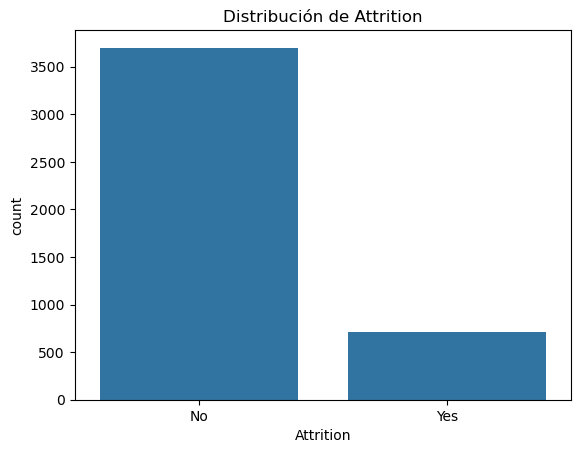

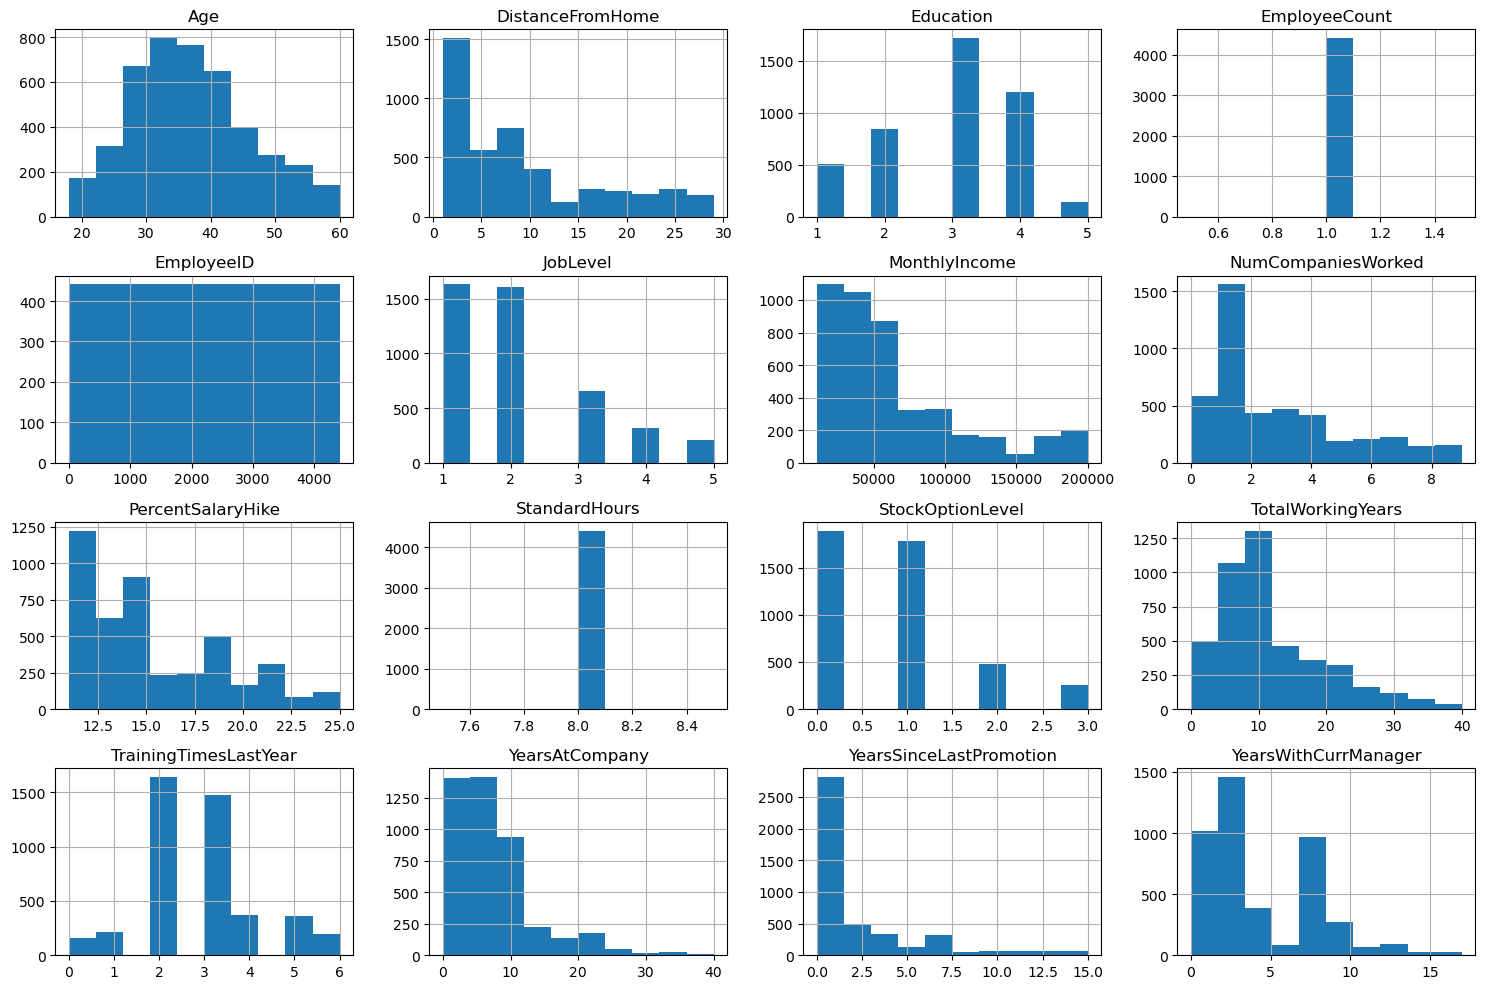

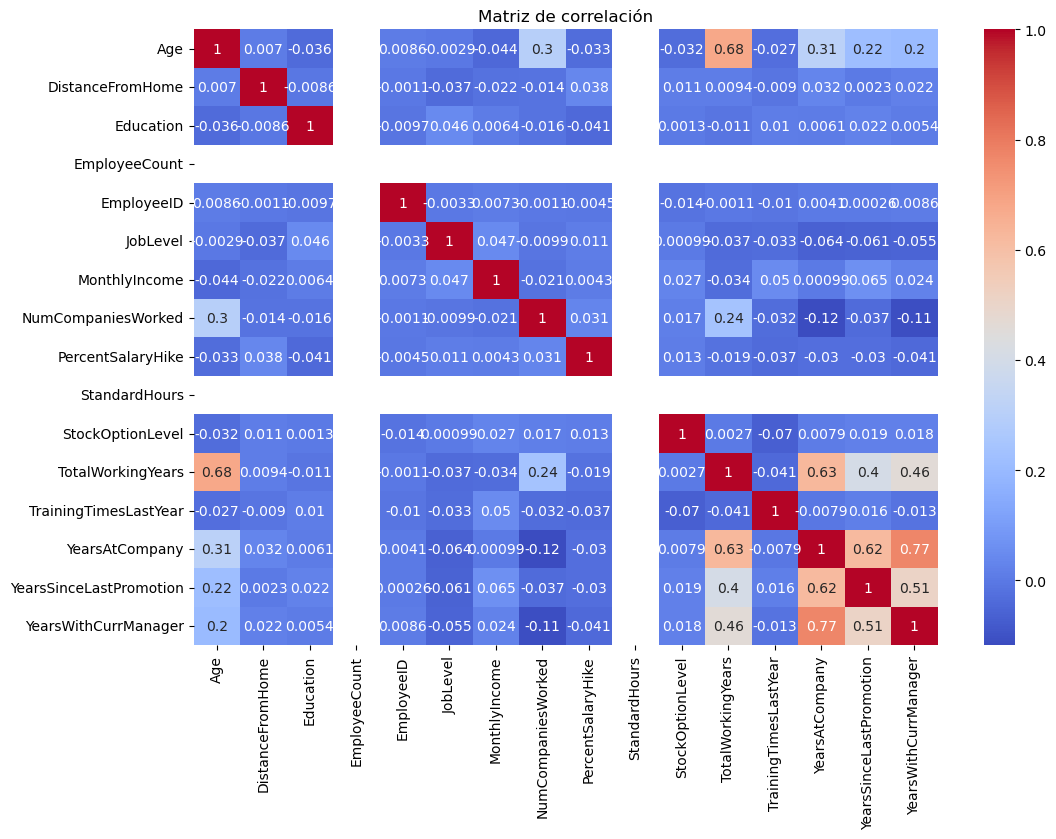

In [5]:
# 3. EDA - Análisis Exploratorio de Datos
# =============================
# Información general
df.info()

# Resumen estadístico
df.describe()

# Conteo de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
sns.countplot(data=df, x='Attrition')
plt.title('Distribución de Attrition')
plt.show()

# Histograma de variables numéricas
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

# Correlación de variables numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [17]:
# =============================
# 4. Feature Engineering (Corregido con validación)
# =============================
from sklearn.impute import SimpleImputer

# Eliminar columnas irrelevantes
cols_drop = ['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours']  
df = df.drop(columns=cols_drop, errors='ignore')

# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Imputación categóricas (si existen)
if categorical_cols:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Imputación numéricas (si existen)
if numeric_cols:
    imputer_num = SimpleImputer(strategy='mean')
    df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# One-Hot Encoding (solo si había categóricas originales)
df = pd.get_dummies(df, drop_first=True)

# Separar X e y
y = df['Attrition_Yes']
X = df.drop(columns=['Attrition_Yes'])

# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# 5. Entrenamiento del modelo
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# 6. Evaluación
# ======================================================
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92      1110
        True       0.63      0.14      0.22       213

    accuracy                           0.85      1323
   macro avg       0.74      0.56      0.57      1323
weighted avg       0.82      0.85      0.80      1323



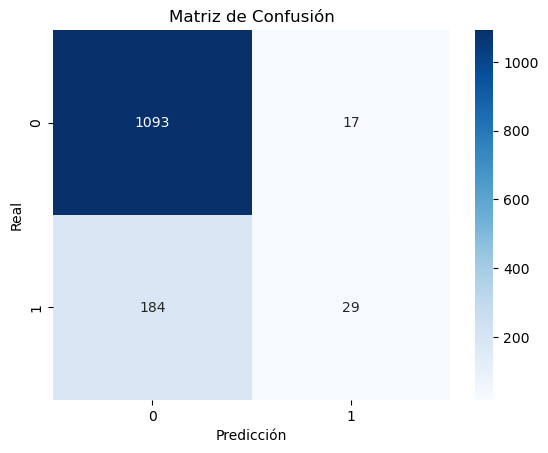

In [21]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

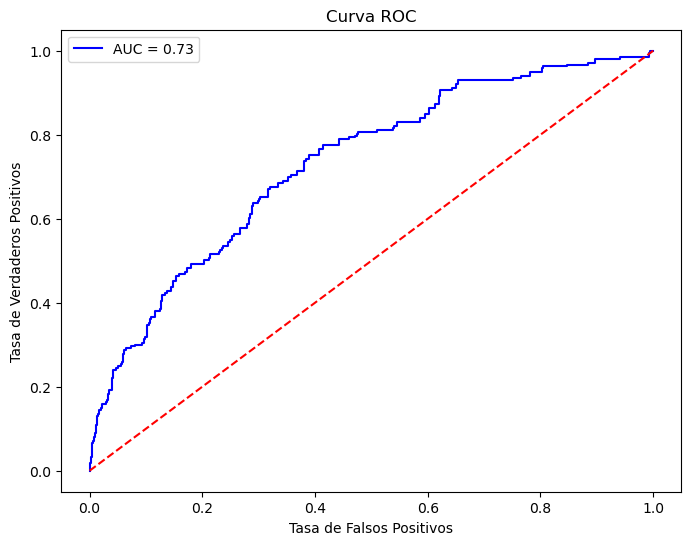

In [22]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

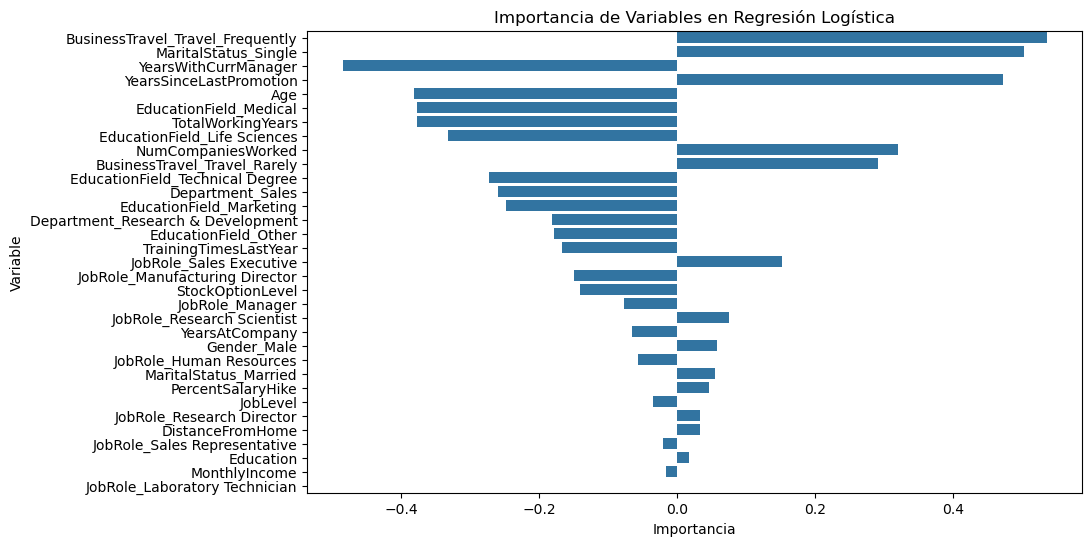

,Variable,Importancia
13,BusinessTravel_Travel_Frequently,0.536816
32,MaritalStatus_Single,0.503960
12,YearsWithCurrManager,-0.484831
11,YearsSinceLastPromotion,0.473148
0,Age,-0.380740
19,EducationField_Medical,-0.376677
8,TotalWorkingYears,-0.376657
17,EducationField_Life Sciences,-0.331652
5,NumCompaniesWorked,0.321063
14,BusinessTravel_Travel_Rarely,0.291862


In [23]:
# 7. Importancia de variables
# ======================================================
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': log_reg.coef_[0]
}).sort_values(by='Importancia', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importancia', y='Variable')
plt.title('Importancia de Variables en Regresión Logística')
plt.show()

display(feature_importance)
